In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from random import randint

import pandas as pd
import csv

In [2]:
with open('chembl_thrombin_ic50.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligands = [Chem.MolFromSmiles(m["Smiles"]) for m in reader]

supplier = Chem.SDMolSupplier("drugbank.sdf")
drugbank = [m for m in supplier if m!=None]

print(supplier[0].GetPropNames())
print(len(ligands))
print(len(drugbank))

RDKit ERROR: [21:54:42] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:54:42] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [21:54:42] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [21:54:42] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [21:54:42] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:54:43] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:54:43] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [21:54:43] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:54:43] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [21:54:43] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [21:54:43] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [21:54:43] Can't kek

3236
7113


RDKit ERROR: [21:54:45] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [21:54:45] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [21:54:45] ERROR: Could not sanitize molecule ending on line 1151592


Zkouška

In [3]:
toluene_pattern = Chem.MolFromSmarts('Cc1ccccc1')

phenylalanine = Chem.MolFromSmiles('O=C(O)[C@H](CC1=CC=CC=C1)N')
phenylalanine.HasSubstructMatch(toluene_pattern)

True

In [4]:
alanine_pattern = Chem.MolFromSmarts('O=C(O)[C@H](C)N')
phenylalanine.HasSubstructMatch(alanine_pattern)

True

In [5]:
ethynylestradiol = Chem.MolFromSmiles('Oc1cc4c(cc1)[C@H]3CC[C@]2([C@@H](CC[C@]2(C#C)O)[C@@H]3CC4)C')
ethynylestradiol.HasSubstructMatch(toluene_pattern)

True

In [6]:
import itertools
hit_atoms = ethynylestradiol.GetSubstructMatch(toluene_pattern)
hit_bonds = [ethynylestradiol.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if ethynylestradiol.GetBondBetweenAtoms(i, j)]
hit_atoms, hit_bonds

((7, 4, 3, 2, 1, 6, 5), [6, 3, 4, 2, 1, 21, 5])

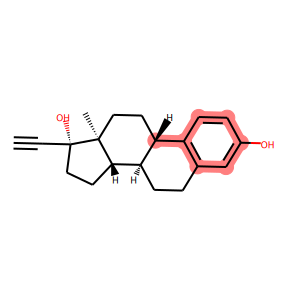

In [7]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, ethynylestradiol, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

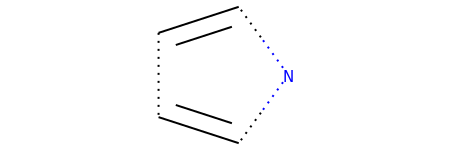

In [8]:
pyrrole = Chem.MolFromSmarts("N1C=CC=C1")
pyrrole

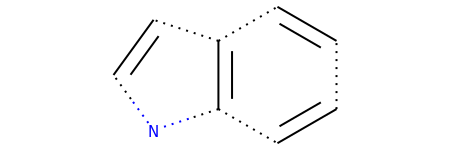

In [9]:
indole = Chem.MolFromSmarts("C12=C(NC=C2)C=CC=C1")
indole

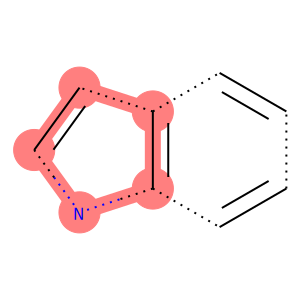

In [10]:
atoms_matched = list(indole.GetSubstructMatch(pyrrole))
bonds_matched = []
for bond in pyrrole.GetBonds():
    first = atoms_matched[bond.GetBeginAtomIdx()]
    second = atoms_matched[bond.GetEndAtomIdx()]
    bonds_matched.append(indole.GetBondBetweenAtoms(first,second).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, indole, highlightAtoms = atoms_matched, highlightBonds = bonds_matched)#
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

Zkouška, zda něco nenajdu.

In [11]:
has_pyrrole = [l for l in ligands if l.HasSubstructMatch(pyrrole)]
len(has_pyrrole)

0

Jsem vcelku překvapený, že se pyrrol nikde nevyskytuje.

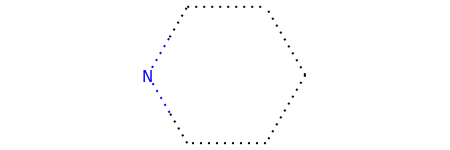

In [12]:
pyridine = Chem.MolFromSmarts("c1ccncc1")
pyridine

In [13]:
has_py = [l for l in ligands if l.HasSubstructMatch(pyridine)]
len(has_py)

475

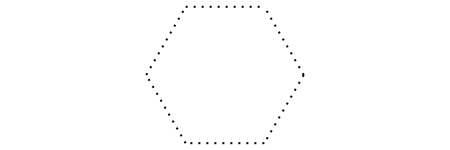

In [14]:
benzene = Chem.MolFromSmarts("c1ccccc1")
benzene

In [15]:
has_phenyl = [l for l in ligands if l.HasSubstructMatch(benzene)]
len(has_phenyl)

3000

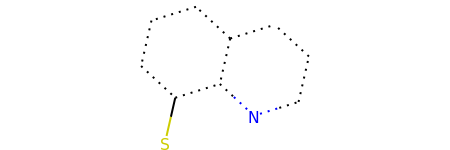

In [16]:
qt = Chem.MolFromSmarts("c12cccc(-S)c1nccc2")
qt

In [17]:
has_qt = [l for l in ligands if l.HasSubstructMatch(qt)]
len(has_qt)

10

Nakonec jsem proběhl struktury v datasetu a zadal vzorec, který se mi zdál být vcelku častý. To dopadlo relativně dobře. Dále jsem pokračoval vizualizací:

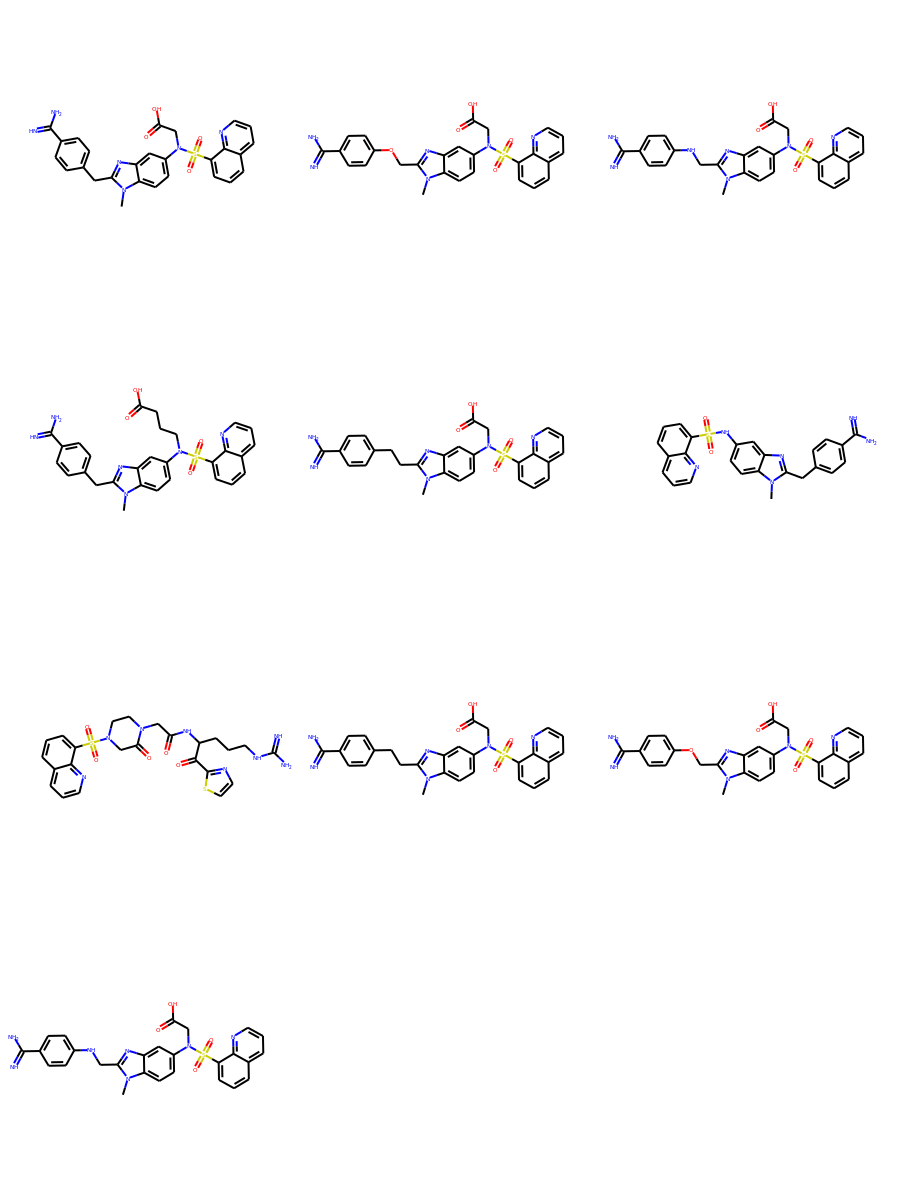

In [18]:
Draw.MolsToGridImage(has_qt, molsPerRow=3, subImgSize=(300,300))

In [19]:
has_qt = [l for l in drugbank if l.HasSubstructMatch(qt)]
len(has_qt)

0

In [20]:
qt_thrombin = [len(l.GetSubstructMatches(qt)) for l in ligands if len(l.GetSubstructMatches(qt)) != 0 ]
print("sum of ligands: " + str(len(ligands)))
print("sum of ligands bearing qt: " + str(len(qt_thrombin)))
print("average number of qt per ligand:" + str(sum(qt_thrombin)/len(qt_thrombin)))
max(qt_thrombin)

sum of ligands: 3236
sum of ligands bearing qt: 10
average number of qt per ligand:1.0


1

In [21]:
qt_db = [len(d.GetSubstructMatches(qt)) for d in drugbank if len(d.GetSubstructMatches(qt)) != 0]
print("celkovy pocet ligandu: " + str(len(drugbank)))
print("pocet ligandu s amk: " + str(len(qt_db)))
print("prumerny pocet amk na jednom ligandu:" + str(sum(qt_db)/len(qt_db)))
max(qt_db)

celkovy pocet ligandu: 7113
pocet ligandu s amk: 0


ZeroDivisionError: division by zero

Tohle je vcelku logický výsledek, který mě mohl napadnout - v DrugBanku prostě nic není. :-)

Zkouším vyhledat látky podobné této, která mi přišla na mysl:

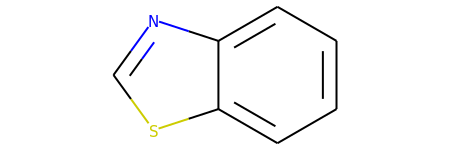

In [22]:
this = Chem.MolFromSmiles("C12=CC=CC=C1N=CS2")
this

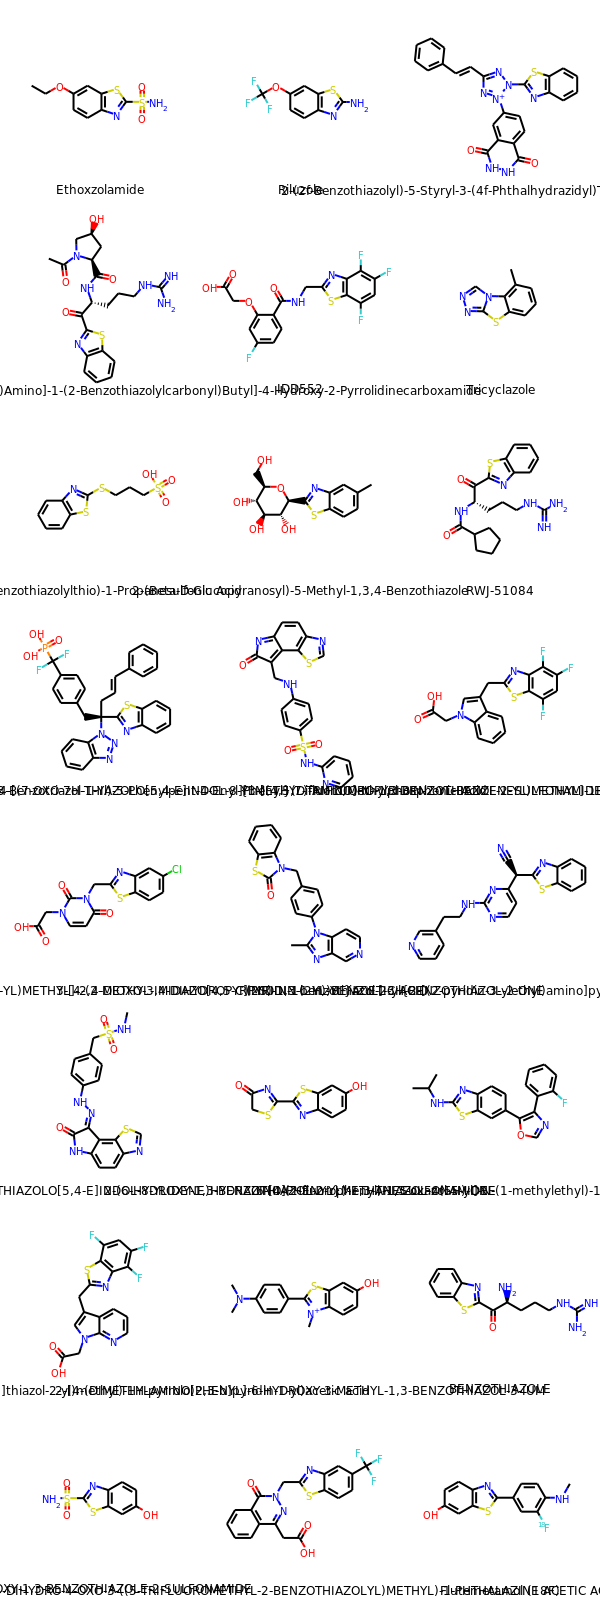

In [23]:
similar_to_this = [l for l in drugbank if l.HasSubstructMatch(this)]
Draw.MolsToGridImage(similar_to_this, molsPerRow=3, legends=[l.GetProp("GENERIC_NAME") for l in similar_to_this])

24 vcelku hezkých molekul, které obsahují vyhledávaný fragment.

In [30]:
from itertools import chain
pains = []
with open('p_l15.txt', 'r') as f, open('p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t')
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")])

In [25]:
df_ligands = pd.DataFrame(columns=["ligand", "pain_assoc", "pain_str"])
for l in ligands:
    for p in pains:
        if l.HasSubstructMatch(p[0]):
            x = {"ligand": l, "pain_assoc": p[0], "pain_str": p[1]}
            df_ligands = df_ligands.append(x, ignore_index=True)
df_ligands

,ligand,pain_assoc,pain_str
0,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2642ee0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc21f8760>,quinone_D(2)
1,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2642ee0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203ad0>,imine_one_A(321)
2,<rdkit.Chem.rdchem.Mol object at 0x7fcfc26463f0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203cb0>,anil_di_alk_D(198)
3,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2650df0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc21f8760>,quinone_D(2)
4,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2650df0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203ad0>,imine_one_A(321)
5,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2653300>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203a30>,azo_A(324)
6,<rdkit.Chem.rdchem.Mol object at 0x7fcfc26533a0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203a30>,azo_A(324)
7,<rdkit.Chem.rdchem.Mol object at 0x7fcfc265f670>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203bc0>,ne_rhod_A(235)
8,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2670cb0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc21f8760>,quinone_D(2)
9,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2670cb0>,<rdkit.Chem.rdchem.Mol object at 0x7fcfc2203ad0>,imine_one_A(321)


In [26]:
print("sum of ligands containing pains: " + str(len(df_ligands)))
print("percentage of dataset ligands containing pains: " + str(len(df_ligands)/len(ligands)))
df_ligands["pain_str"].value_counts()

sum of ligands containing pains: 16
percentage of dataset ligands containing pains: 0.004944375772558714


imine_one_A(321)      4
quinone_D(2)          4
azo_A(324)            3
ne_rhod_A(235)        2
anil_di_alk_D(198)    2
quinone_A(370)        1
Name: pain_str, dtype: int64

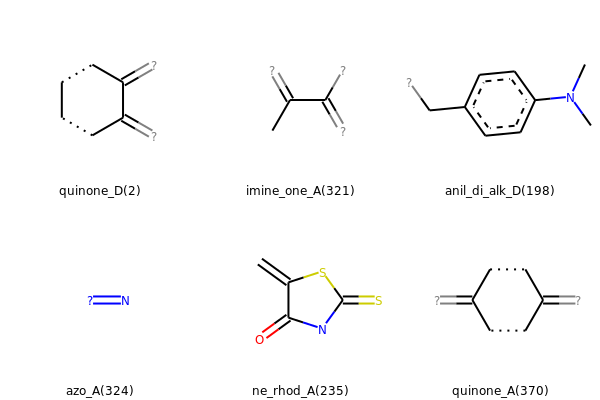

In [27]:
Draw.MolsToGridImage(df_ligands["pain_assoc"].unique().tolist(), molsPerRow=3, legends=df_ligands["pain_str"].unique().tolist())

Můj dataset má 16 ligandů obsahující některou z PAINS zobrazených výše.

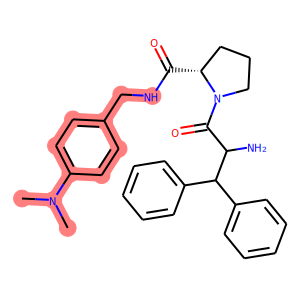

anil_di_alk_D(198)


In [29]:
i = randint(0, len(df_ligands)-1)
ligand = df_ligands["ligand"][i]
pain = df_ligands["pain_assoc"][i]
atoms_matched = list(ligand.GetSubstructMatch(pain))
bonds_matched = []

for bond in pain.GetBonds():
    first = atoms_matched[bond.GetBeginAtomIdx()]
    second = atoms_matched[bond.GetEndAtomIdx()]
    bonds_matched.append(ligand.GetBondBetweenAtoms(first,second).GetIdx())
    
d = rdMolDraw2D.MolDraw2DSVG(300, 300)
rdMolDraw2D.PrepareAndDrawMolecule(d, ligand, highlightAtoms = atoms_matched, highlightBonds = bonds_matched)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))
print(df_ligands["pain_str"][i])

Příklad jedné ze struktur obsahující PAINS. Dal bych ruku do ohně za to, že někdo v naší skupině (medicinální chemie) vařil látky s podobným fragmentem. :)